# Quasar Position

In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [45]:
mu = 1
N = 7
sigma = 0.2
x_axis = np.linspace(0, 2, 1000)
np.random.seed(10)

### 1. Homoscedastic Gaussians

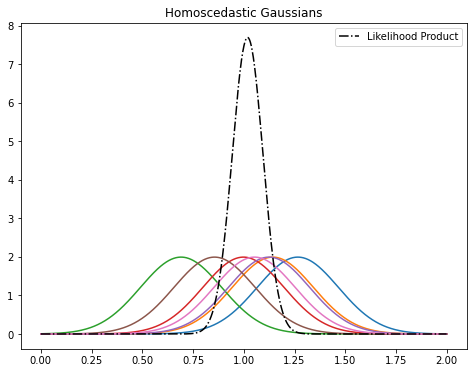

In [46]:
positions = norm(mu, sigma).rvs(N)
fig, ax = plt.subplots(figsize=(8, 6))

distrib = []

for i in range(N):
    temporary = norm(positions[i], sigma)
    distrib.append(temporary.pdf(x_axis))
    plt.plot(x_axis, temporary.pdf(x_axis))

distrib = np.array(distrib)
likelihood = np.prod(distrib, axis=0)

plt.title('Homoscedastic Gaussians')
plt.plot(x_axis, likelihood, c='black', ls='dashdot', label='Likelihood Product')
plt.legend()
plt.show()

In [47]:
sorted = np.argsort(likelihood)

#Likelihood is maximized at the last [-1] index, while is minimized at the first [0]
MLx = x_axis[sorted[-1]]

sample_mean = np.mean(positions)

print('Likelihood is maximized at {:.4f}'.format(MLx))
print('The Maximum likelihood estimator is the sample mean and is {:.4f}'.format(sample_mean))

Likelihood is maximized at 1.0190
The Maximum likelihood estimator is the sample mean and is 1.0189


### 2. Fisher Matrix

Sigma mu derived with Fisher matrix: 0.0756.
Sigma mu from MLE: 0.0756


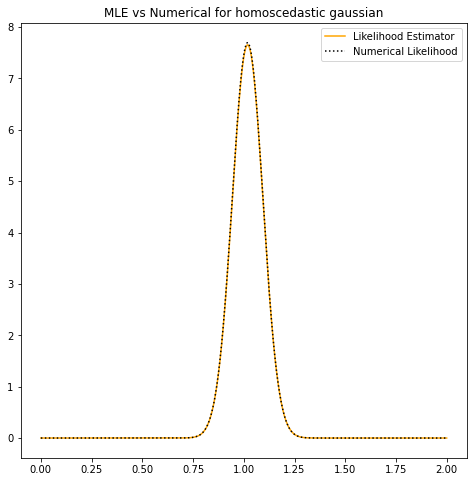

In [48]:
log_likelihood = np.log(likelihood)
II_derivative = np.diff(np.diff(log_likelihood))

#Delta_theta == Resolution on the x axis
delta_theta = x_axis[1] - x_axis[0]

fisher_matrix = (-1) * (II_derivative/(delta_theta**2))
sigma_mu_fisher = np.mean(fisher_matrix**(-0.5))

MLE_sigma_mu = sigma/N**0.5

print('Sigma mu derived with Fisher matrix: {:.4f}.\nSigma mu from MLE: {:.4f}'.format(sigma_mu_fisher, MLE_sigma_mu))

likelihood_estimator = norm(MLx, sigma_mu_fisher)

#Eyeballing the normalization constant
normalization = 1.45

fig, ax = plt.subplots(figsize=(8, 8))
plt.title('MLE vs Numerical for homoscedastic gaussian')
plt.plot(x_axis, normalization*likelihood_estimator.pdf(x_axis), c='orange', label='Likelihood Estimator')
plt.plot(x_axis, likelihood, c='black', ls=':', label='Numerical Likelihood')
plt.legend()
plt.show()

### 3. Heteroscedastic Gaussians

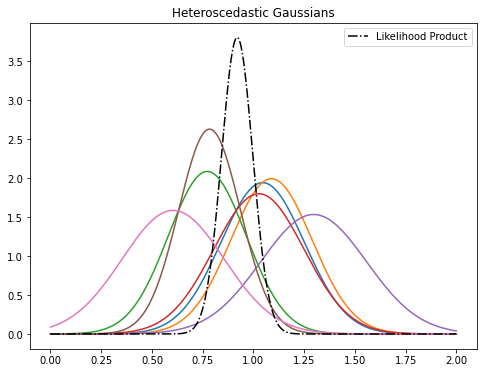

In [49]:
sigma_heteroscedastic = norm(0.2, 0.05).rvs(N)
positions = norm(mu, sigma).rvs(N)
fig, ax = plt.subplots(figsize=(8, 6))

distrib = []

for i in range(N):
    temporary = norm(positions[i], sigma_heteroscedastic[i])
    distrib.append(temporary.pdf(x_axis))
    plt.plot(x_axis, temporary.pdf(x_axis))

distrib = np.array(distrib)
likelihood = np.prod(distrib, axis=0)

plt.title('Heteroscedastic Gaussians')
plt.plot(x_axis, likelihood, c='black', ls='dashdot', label='Likelihood Product')
plt.legend()
plt.show()

In [50]:
sorted = np.argsort(likelihood)

#Likelihood is maximized at the last (-1) index, while is minimized at the first (0)
MLx = x_axis[sorted[-1]]

#Since gaussians have heteroschedastic errors the average needs to be weighted on single sigmas
sample_mean = np.average(positions, weights=1/sigma_heteroscedastic**2)

print('Likelihood is maximized at {:.4f}'.format(MLx))
print('The Maximum likelihood estimator is the sample mean and is {:.4f}'.format(sample_mean))

Likelihood is maximized at 0.9209
The Maximum likelihood estimator is the sample mean and is 0.9201


Sigma mu derived with Fisher matrix: 0.0766.
Sigma mu from MLE: 0.0766


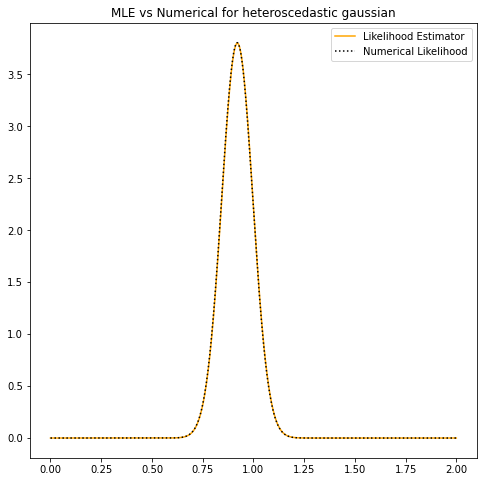

In [51]:
log_likelihood = np.log(likelihood)
II_derivative = np.diff(np.diff(log_likelihood))

#Delta_theta == Resolution on the x axis
delta_theta = x_axis[1] - x_axis[0]

fisher_matrix = (-1) * (II_derivative/(delta_theta**2))
sigma_mu_fisher = np.mean(fisher_matrix**(-0.5))

#For heteroscedastic measurements the MLE for sigma mu is
sigma_mu_heteroscedastic = np.sum(sigma_heteroscedastic**(-2))**(-0.5)

likelihood_estimator = norm(MLx, sigma_mu_fisher)

#Eyeballing the normalization constant
normalization = 0.73

print('Sigma mu derived with Fisher matrix: {:.4f}.\nSigma mu from MLE: {:.4f}'.format(sigma_mu_fisher, sigma_mu_heteroscedastic))

fig, ax = plt.subplots(figsize=(8, 8))
plt.title('MLE vs Numerical for heteroscedastic gaussian')
plt.plot(x_axis, normalization*likelihood_estimator.pdf(x_axis), c='orange', label='Likelihood Estimator')
plt.plot(x_axis, likelihood, c='black', ls=':', label='Numerical Likelihood')
plt.legend()
plt.show()